<img style="width:100%" src="https://lh3.googleusercontent.com/1KtDnHo8vrJjso7gzfYRqOUOEh2Th5rFsXSQv-XfDc3G4EiFIx-E9IbEahvYAodH9xRVFtdEcOs-KxkPRhuWgniCxqKWTnAFOi6-RJAZ7uyELjwgunLma6RTzlwwC1PS5aoMWPSzvBt_S1DCPEwbKchV7XwIa9A91XS1xkBbcB0RgfFGp20GGxAcR7LcJk56FuaJcSzY_SxPjyqzx_InhrAN3Z1CdKM6A5EkVdnBfqD7ygObifR_zHZVFWUX76dY9uIjL65GvhcPvI-FZBrdbdKbLDvDMERjv6-H_tBTH0ekRW9WhZo3V-bl66cvcyGhkEkE8JKZ6danXsErSiIayrZ7WeJ-GZhjCQgb9IHPc4WLWMJut9UnZI7aoLpgsogN_DSf5yT7TnSN1s_taXbGs2mlNWZ6Rh5RFxWeku1sX9daEAvGWKMBtYp_RXJ75HHnvN-LTv34yJrjsHJsjm9LB4vwfNu0-GVf4ax8xEL5Jei6yOfUfr_xNfsGejJtLpacNWa82A5z4j5pdK0O5FSmgqHhxoAqW-x-LExGf3NYfgCLQ4AND331i7ZGx1cv1RCzioN6pQ6cq3G0wqjaSZ3CjaGFWaQxixE2Jg6jzUMAIL4cHQShMfl37EDC=w1898-h410-no" />

### Category:

- <a href="#Description">Description</a>
- <a href='#Sample'>Sample Data</a>
- <a href='#Data'>Data Preprocessing</a>
  - Data Reduction
  - Check Missing Values
- <a href='#Feature Engineering'>Feature Engineering</a>
 - Add Features
 - Scale Numeric Features
- <a href='#Encoding'>Dealing with Data Types</a>
 - Bucket low frequency categories
 - Encoding 'company', 'category', and 'brand'
- <a href='#Exploratory Data Analysis'>Exploratory Data Analysis</a>
 - Outlier Detection
 - Corrletation Heatmap
 - Univariate Plots
- <a href='#Implementing Algorithms'>Model Execution Strategy</a>
 - Single Model
 - Ensemble Model
 - Stacking

### Description <a name='Description' />
The competition is to predict repeat buyers (those who redeem a coupon and purchase that product afterwards). For this we have the labelled data (did become repeat buyer, did not become repeat buyer) for about 160,000 shoppers (the trainHistory set).

Our task is to predict the labels for about 150,000 other shoppers (the testHisotory set). For this we can use a file called transactions.csv. It’s a huge file (unzipped about 22GB) containing nearly 350 million rows. The total amount spend in the transaction data is nearing 1.5 billion.

### Sample Data <a name='Sample' />
We use a sample dataset with only a few shoppers to explore the transaction data.

In [37]:
import numpy as np 
import pandas as pd
from datetime import datetime

In [2]:
sample = pd.read_csv('sample.csv')

In [3]:
sample.chain.unique()

array([205])

In [4]:
sample.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59
2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99
3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99
4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38


### Data Preprocessing <a name='Data' />

#### 1. Data Reduction
 - Chosing transactions from  **chain=2,4,6,8,10,12,14**. Output into a new file "reduced2.csv"
 - Keeping data only from 1 year from "reduced2.csv". Output into a new file "data_s.csv"
 - Using only customers in trainHistory which have at least one transaction in the reduced transaction dataset
 - Inner join train_reduced & "offers.csv" on offer. Output into a new file "combine.csv"  

#### 2. Check Missing Values
 - combine.csv
 - data_s.csv

In [5]:
loc_transactions = "transactions.csv"
loc_reduced = "reduced2.csv"  #Output file 
def reduce_data(loc_transactions, loc_reduced):
    with open(loc_reduced, "wb") as outfile:
        for e, line in enumerate( open(loc_transactions) ):
            if line.split(",")[1] in ['2','4','6','8','10','12','14']:  # If you want larger data, use ['2,'4','8'] instead of ['4'].
                outfile.write( line )

reduce_data(loc_transactions, loc_reduced)
#reduced2.csv contains transactions from chain_id = 2,4,6,8 
#redcued2.csv is your new transactions data. Use customers in this transaction data to build a model.

In [6]:
import pandas as pd
data=pd.read_csv("reduced2.csv",header=None,names=["id","chain","dept",'category','company','brand','date','productsize','productmeasure','productquantity','productamount'])

In [7]:
print data.chain.unique()

[ 4 14  2 12  8 10  6]


In [376]:
##########################################

In [8]:
#Keeping data only from 1 year from "reduced2.csv"
drops=[]
for i in range(len(data.id)):
    dates=data.date[i].strip().split('-')
    if (dates[0]=='2012' and int(dates[1])>=5) or (dates[0]=='2013' and int(dates[1])<5):
        a=1
    else:
        drops.append(data.index[i])
        
data_s=data.drop(drops)
data_s.reset_index(inplace=True,drop=True)

In [9]:
data_s.to_csv('data_s.csv',index=False)

In [10]:
data_s.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,productquantity,productamount
0,12524696,4,58,5825,102113020,15704,2012-05-03,14.00,OZ,2,5.70
1,12524696,4,9,907,102113020,15704,2012-05-03,16.00,OZ,1,1.69
2,12524696,4,4,419,1074759979,7168,2012-05-03,3.17,OZ,1,1.70
3,12524696,4,55,5567,107064070,19704,2012-05-07,21.00,OZ,2,7.00
4,12524696,4,55,5567,107064070,19704,2012-05-07,24.00,OZ,1,3.50


In [11]:
data_s.shape

(18717530, 11)

In [378]:
##########################################

In [2]:
#Use only customers which have at least one transaction in the reduced transaction dataset
train = pd.read_csv('trainHistory.csv')
test = pd.read_csv('testHistory.csv')
offer = pd.read_csv('offers.csv')
data_s = pd.read_csv('data_s.csv')

In [13]:
cust_s_train = pd.merge(data_s,train,on=['id'])
cust_s_train.shape

(9126861, 17)

In [14]:
unique = cust_s_train.id.unique()
len(unique)

9760

In [15]:
train_reduced = train[train['id'].isin(unique)]
train_reduced.shape

(9760, 7)

In [10]:
##########################################

In [16]:
#Combine train_reduced & "offers.csv" on offer
combine = pd.merge(train_reduced,offer,on=['offer'])
combine.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
0,13179265,14,1197502,8,0,f,2013-03-29,3203,1,106414464,0.75,13474
1,13873775,4,1197502,1,0,f,2013-03-26,3203,1,106414464,0.75,13474
2,13974451,4,1197502,1,0,f,2013-03-26,3203,1,106414464,0.75,13474
3,14381137,4,1197502,1,0,f,2013-04-04,3203,1,106414464,0.75,13474
4,15941277,14,1197502,8,1,t,2013-03-26,3203,1,106414464,0.75,13474


In [ ]:
##########################################

In [27]:
# Check missing values
combine.isnull().sum()

id             0
chain          0
offer          0
market         0
repeattrips    0
repeater       0
offerdate      0
category       0
quantity       0
company        0
offervalue     0
brand          0
dtype: int64

In [28]:
data_s.isnull().sum()

id                      0
chain                   0
dept                    0
category                0
company                 0
brand                   0
date                    0
productsize             0
productmeasure     675692
productquantity         0
productamount           0
dtype: int64

In [17]:
# Export combined dataset
combine.to_csv('combine.csv',index=False)

### Feature Engineering <a name="Feature Engineering" />

**A large part of this competition is feature engineering: Creating good indicative features from the purchase history.**

We will generate the following features:

**total_spend**: the total amount spend by the shopper in the reduced dataset  
**total_quant**: the total quantity (number of units) spend by the shopper in the reduced dataset  
**total_trips**: number of unique dates the customer visited the chain  
**ave_spend**: average amount spend per trip  
**ave_quant**: average quantity spend per trip  

**unique_company_bought**: total number of unique companies from bought products  
**unique_category_bought**: total number of unique categories from bought products  
**unique_brand_bought**: total number of unique brands from bought products  

**ave_unique_company_bought**: average number of unique companies from bought products per trip   
**ave_unique_category_bought**: average number of unique categories from bought products per trip   
**ave_unique_brand_bought**: average number of unique brands from bought products per trip   

**days_last_offer**: number of days between last trip and offerdate

**has_bought_company**: the number of times a shopper has bought from the company on offer    
**has_bought_company_a**: the total amount the shopper has bought from the company on offer  
**has_bought_company_q**: the quantity of items bought from the company on offer   
**has_bought_company_30**: the number of times a shopper has bought from the company on offer in the 30 days before the date the coupon was offered  
**has_bought_company_60**: the number of times a shopper has bought from the company on offer in the 60 days before the date the coupon was offered  
......   
**has_bought_company_180**: 180 days before  


These same features for:

**has_bought_category**: the number of times a shopper has bought from the category on offer      
**has_bought_brand**: the number of times a shopper has bought from the brand on offer    

And:

**never_bought_company**: a negative feature for when the shopper has never bought from the company on offer before   
**never_bought_category**: a negative feature for when the shopper has never bought from the category on offer before  
**never_bought_brand**: a negative feature for when the shopper has never bought from the brand on offer before  
**has_bought_company_brand_category**: if this feature is present the shopper has bought from the company, brand, and category on offer      
**has_bought_brand_category**: if this feature is present the shopper has bought from the brand and category on offer      
**has_bought_brand_company**: if this feature is present the shopper has bought from the brand and company on offer  


In [18]:
combine = pd.read_csv('combine.csv')

In [19]:
combine.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
0,13179265,14,1197502,8,0,f,2013-03-29,3203,1,106414464,0.75,13474
1,13873775,4,1197502,1,0,f,2013-03-26,3203,1,106414464,0.75,13474
2,13974451,4,1197502,1,0,f,2013-03-26,3203,1,106414464,0.75,13474
3,14381137,4,1197502,1,0,f,2013-04-04,3203,1,106414464,0.75,13474
4,15941277,14,1197502,8,1,t,2013-03-26,3203,1,106414464,0.75,13474


In [20]:
#Feature Extraction
def diff_days(s1,s2):
    date_format = "%Y-%m-%d"
    a = datetime.strptime(s1, date_format)
    b = datetime.strptime(s2, date_format)
    delta = b - a
    return delta.days


def extract_features(cust_id):
    df = combine.loc[combine.id == cust_id,:]
    df = df.reset_index(drop=True)
    
    offer_category = df.category.values[0]
    offer_company = df.company.values[0]
    offer_brand = df.brand.values[0]
    
    data_id = data_s.loc[data_s.id == cust_id,:]
    data_id = data_id.reset_index(drop=True)
    
    
    #generate features from transaction record
    df['total_spend'] = data_id.productamount.sum()
    df['total_quant'] = data_id.productquantity.sum()
    df['total_trips'] = len(data_id.date.unique())
    
    df['ave_spend'] = df['total_spend'] / df['total_trips']
    df['ave_quant'] = df['total_quant'] / df['total_trips']
    
    df['unique_company_bought'] = len(data_id.company.unique())
    df['unique_category_bought'] = len(data_id.category.unique())
    df['unique_brand_bought'] = len(data_id.brand.unique())
    
    df['unique_company_bought'] = len(data_id.company.unique())
    df['unique_category_bought'] = len(data_id.category.unique())
    df['unique_brand_bought'] = len(data_id.brand.unique())
    
    df['ave_unique_company_bought'] = len(data_id.company.unique()) / df['total_trips']
    df['ave_unique_category_bought'] = len(data_id.category.unique()) / df['total_trips']
    df['ave_unique_brand_bought'] = len(data_id.brand.unique()) / df['total_trips']
    
    df['days_last_offer'] = diff_days(max(data_id.date),df.loc[0].offerdate)
    
    df['has_bought_company'] = 0
    df['has_bought_company_q'] = 0
    df['has_bought_company_a'] = 0
    df['has_bought_company_30'] = 0
    df['has_bought_company_q_30'] = 0
    df['has_bought_company_a_30'] = 0
    df['has_bought_company_60'] = 0
    df['has_bought_company_q_60'] = 0
    df['has_bought_company_a_60'] = 0
    df['has_bought_company_90'] = 0
    df['has_bought_company_q_90'] = 0
    df['has_bought_company_a_90'] = 0
    df['has_bought_company_180'] = 0
    df['has_bought_company_q_180'] = 0
    df['has_bought_company_a_180'] = 0
    
    df['has_bought_category'] = 0
    df['has_bought_category_q'] = 0
    df['has_bought_category_a'] = 0
    df['has_bought_category_30'] = 0
    df['has_bought_category_q_30'] = 0
    df['has_bought_category_a_30'] = 0
    df['has_bought_category_60'] = 0
    df['has_bought_category_q_60'] = 0
    df['has_bought_category_a_60'] = 0
    df['has_bought_category_90'] = 0
    df['has_bought_category_q_90'] = 0
    df['has_bought_category_a_90'] = 0
    df['has_bought_category_180'] = 0
    df['has_bought_category_q_180'] = 0
    df['has_bought_category_a_180'] = 0
    
    df['has_bought_brand'] = 0
    df['has_bought_brand_q'] = 0
    df['has_bought_brand_a'] = 0
    df['has_bought_brand_30'] = 0
    df['has_bought_brand_q_30'] = 0
    df['has_bought_brand_a_30'] = 0
    df['has_bought_brand_60'] = 0
    df['has_bought_brand_q_60'] = 0
    df['has_bought_brand_a_60'] = 0
    df['has_bought_brand_90'] = 0
    df['has_bought_brand_q_90'] = 0
    df['has_bought_brand_a_90'] = 0
    df['has_bought_brand_180'] = 0
    df['has_bought_brand_q_180'] = 0
    df['has_bought_brand_a_180'] = 0
    
    for i in range(len(data_id)):
        if data_id.loc[i].company == offer_company:
            df['has_bought_company'] += 1.0
            df['has_bought_company_q'] += float( data_id.loc[i].productquantity )
            df['has_bought_company_a'] += float( data_id.loc[i].productamount )

            date_diff_days = diff_days(data_id.loc[i].date,df.loc[0].offerdate)
            if date_diff_days < 30:
                df['has_bought_company_30'] += 1.0
                df['has_bought_company_q_30'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_30'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 60:
                df['has_bought_company_60'] += 1.0
                df['has_bought_company_q_60'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_60'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 90:
                df['has_bought_company_90'] += 1.0
                df['has_bought_company_q_90'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_90'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 180:
                df['has_bought_company_180'] += 1.0
                df['has_bought_company_q_180'] += float( data_id.loc[i].productquantity )
                df['has_bought_company_a_180'] += float( data_id.loc[i].productamount )

                    
        if data_id.loc[i].category == offer_category:
            df['has_bought_category'] += 1.0
            df['has_bought_category_q'] += float( data_id.loc[i].productquantity )
            df['has_bought_category_a'] += float( data_id.loc[i].productamount )

            date_diff_days = diff_days(data_id.loc[i].date,df.loc[0].offerdate)
            if date_diff_days < 30:
                df['has_bought_category_30'] += 1.0
                df['has_bought_category_q_30'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_30'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 60:
                df['has_bought_category_60'] += 1.0
                df['has_bought_category_q_60'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_60'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 90:
                df['has_bought_category_90'] += 1.0
                df['has_bought_category_q_90'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_90'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 180:
                df['has_bought_category_180'] += 1.0
                df['has_bought_category_q_180'] += float( data_id.loc[i].productquantity )
                df['has_bought_category_a_180'] += float( data_id.loc[i].productamount )
                   
        if data_id.loc[i].brand == offer_brand:
            df['has_bought_brand'] += 1.0
            df['has_bought_brand_q'] += float( data_id.loc[i].productquantity )
            df['has_bought_brand_a'] += float( data_id.loc[i].productamount )

            date_diff_days = diff_days(data_id.loc[i].date,df.loc[0].offerdate)
            if date_diff_days < 30:
                df['has_bought_brand_30'] += 1.0
                df['has_bought_brand_q_30'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_30'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 60:
                df['has_bought_brand_60'] += 1.0
                df['has_bought_brand_q_60'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_60'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 90:
                df['has_bought_brand_90'] += 1.0
                df['has_bought_brand_q_90'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_90'] += float( data_id.loc[i].productamount )
                        
            if date_diff_days < 180:
                df['has_bought_brand_180'] += 1.0
                df['has_bought_brand_q_180'] += float( data_id.loc[i].productquantity )
                df['has_bought_brand_a_180'] += float( data_id.loc[i].productamount )
                
                #last_id = row[0]
                #if e % 100000 == 0:
                    #print e
    
    return df

In [21]:
#Take 2 hours to run this code
#Create X_features
X_features = pd.DataFrame()
start_time = datetime.now()
for e,cust_id in enumerate(combine.id.values):
    X_features = pd.concat([X_features,extract_features(cust_id)])
    if e%500 == 0:
        print e,datetime.now()-start_time

0 0:00:01.795131
500 0:04:48.440171
1000 0:10:01.223409
1500 0:14:25.857671
2000 0:18:55.465588
2500 0:24:12.437132
3000 0:28:50.219933
3500 0:32:50.507945
4000 0:37:26.177291
4500 0:42:16.929774
5000 0:49:17.613395
5500 0:56:24.612478
6000 1:02:23.478249
6500 1:09:21.003141
7000 1:15:16.077736
7500 1:21:24.889852
8000 1:28:54.554222
8500 1:40:47.535078
9000 1:55:40.412564
9500 2:01:11.953671


In [22]:
X_features['never_bought_company'] = 0
X_features['never_bought_category'] = 0
X_features['never_bought_brand'] = 0
X_features['has_bought_brand_company_category'] = 0
X_features['has_bought_brand_category'] = 0
X_features['has_bought_brand_company'] = 0

X_features = X_features.reset_index(drop=True)

In [23]:
for i in range(len(X_features)):
    #generate negative features
    if X_features.loc[i].has_bought_company == 0:
        X_features.set_value(i,'never_bought_company',1)

    if X_features.loc[i].has_bought_category == 0:
        X_features.set_value(i,'never_bought_category',1)
        
    if X_features.loc[i].has_bought_brand == 0:
        X_features.set_value(i,'never_bought_brand',1)

    if X_features.loc[i].has_bought_company != 0 and X_features.loc[i].has_bought_category != 0 and X_features.loc[i].has_bought_brand != 0:
        X_features.set_value(i,'has_bought_brand_company_category',1) 

    if X_features.loc[i].has_bought_category != 0 and X_features.loc[i].has_bought_brand != 0:
        X_features.set_value(i,'has_bought_brand_category',1)

    if X_features.loc[i].has_bought_company != 0 and X_features.loc[i].has_bought_brand != 0:
         X_features.set_value(i,'has_bought_brand_company',1)


In [24]:
X_features.shape

(9760, 75)

In [25]:
X_features.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,...,has_bought_brand_a_90,has_bought_brand_180,has_bought_brand_q_180,has_bought_brand_a_180,never_bought_company,never_bought_category,never_bought_brand,has_bought_brand_company_category,has_bought_brand_category,has_bought_brand_company
0,13179265,14,1197502,8,0,f,2013-03-29,3203,1,106414464,...,0.0,0.0,0.0,0.0,1,1,1,0,0,0
1,13873775,4,1197502,1,0,f,2013-03-26,3203,1,106414464,...,0.0,0.0,0.0,0.0,0,1,1,0,0,0
2,13974451,4,1197502,1,0,f,2013-03-26,3203,1,106414464,...,0.0,0.0,0.0,0.0,1,1,1,0,0,0
3,14381137,4,1197502,1,0,f,2013-04-04,3203,1,106414464,...,0.0,0.0,0.0,0.0,1,1,1,0,0,0
4,15941277,14,1197502,8,1,t,2013-03-26,3203,1,106414464,...,0.0,0.0,0.0,0.0,0,1,1,0,0,0


In [30]:
# Check missing values
check = X_features.isnull().sum()

check.value_counts()

0    75
dtype: int64

#### Scale Numeric Features

In [129]:
from sklearn.preprocessing import scale

for i in list(X_features)[6:64]:
    X_features[i] = scale(X_features[i])

/Users/Frank/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### Dealing With Data Types <a name='Encoding' />

Create dummies for category, company, and brand.

In [121]:
# Check Data Types
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 97 columns):
id                                   9760 non-null int64
offer                                9760 non-null int64
repeattrips                          9760 non-null int64
repeater                             9760 non-null int64
offerdate                            9760 non-null object
quantity                             9760 non-null int64
offervalue                           9760 non-null float64
total_spend                          9760 non-null float64
total_quant                          9760 non-null int64
total_trips                          9760 non-null int64
ave_spend                            9760 non-null float64
ave_quant                            9760 non-null float64
unique_company_bought                9760 non-null int64
unique_category_bought               9760 non-null int64
unique_brand_bought                  9760 non-null int64
ave_unique_company_bought    

In [38]:
# Check number of unique categories for 'company', 'category', and 'brand'
X_list = ['company','category','brand']
for col_name in X_list:
    unique_cat = len(X_features[col_name].unique())
    print "Feature '{0}' has {1} unique values.".format(col_name,unique_cat)


Feature 'company' has 8 unique values.
Feature 'category' has 10 unique values.
Feature 'brand' has 9 unique values.


In [34]:
# Although, 'company' has a lot of unique categories, some categories only have a few observations
X_features.company.value_counts().sort_values(ascending=False)

106414464    4526
104460040    1799
108079383    1242
104610040    1115
107717272     374
107120272     339
105100050     243
103320030     122
Name: company, dtype: int64

In [44]:
X_features.category.value_counts().sort_values(ascending=False)

3203    4526
2202    1267
2119    1242
5616    1115
5619     374
5558     339
1726     331
4401     243
1703     201
3509     122
Name: category, dtype: int64

In [45]:
X_features.brand.value_counts().sort_values(ascending=False)

13474     4526
3718      1267
6926      1242
15889     1115
7668       532
102504     374
5072       339
13791      243
875        122
Name: brand, dtype: int64

In [47]:
# Bucket low frequency categories
X_features['company'].loc[(X_features['company'] == 107717272) |
                          (X_features['company'] == 107120272) |
                          (X_features['company'] == 105100050) |
                          (X_features['company'] == 103320030) 
                          ] = 'Other'

X_features['category'].loc[(X_features['category'] == 5619) |
                          (X_features['category'] == 5558) |
                          (X_features['category'] == 1726) |
                          (X_features['category'] == 4401) |
                          (X_features['category'] == 1703) |
                          (X_features['category'] == 3509) 
                          ] = 'Other'

X_features['brand'].loc[(X_features['brand'] == 7668) |
                          (X_features['brand'] == 102504) |
                          (X_features['brand'] == 5072) |
                          (X_features['brand'] == 13791) |
                          (X_features['brand'] == 875) 
                          ] = 'Other'


In [50]:
# Creat a list of features to dummy
todummy_list = ['company','category','brand','chain']
# Function to dummy all the specific variables used for modeling
def dummy_df(df,todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x],prefix=x)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis=1)
    return df
#
X_features = dummy_df(X_features,todummy_list)


In [69]:
dummies = pd.get_dummies(X_features['market'],prefix='market')
X_features.drop('market',1,inplace=True)
X_features = pd.concat([X_features,dummies],axis=1)

In [70]:
X_features.head()

,id,offer,repeattrips,repeater,offerdate,quantity,offervalue,total_spend,total_quant,total_trips,...,chain_6,chain_8,chain_10,chain_12,chain_14,market_1,market_4,market_5,market_7,market_8
0,13179265,1197502,0,0,2013-03-29,1,0.75,2030.52,879,77,...,0,0,0,0,1,0,0,0,0,1
1,13873775,1197502,0,0,2013-03-26,1,0.75,5040.49,2361,92,...,0,0,0,0,0,1,0,0,0,0
2,13974451,1197502,0,0,2013-03-26,1,0.75,270.94,103,15,...,0,0,0,0,0,1,0,0,0,0
3,14381137,1197502,0,0,2013-04-04,1,0.75,2408.26,524,30,...,0,0,0,0,0,1,0,0,0,0
4,15941277,1197502,1,1,2013-03-26,1,0.75,2739.98,803,36,...,0,0,0,0,1,0,0,0,0,1


In [71]:
X_features.shape

(9760, 97)

In [ ]:
X_features['repeater'] = 1 * (X_features['repeater'] == 't')

In [134]:
X_features.to_csv('X_features.csv',index=False)

### Exploratory Data Analysis <a name='Exploratory Data Analysis' />
1. Outlier Detection
2. Plot Pearson Correlation Heatmap 
3. Univariate Plots with respect to repeat purchased probability.

In [73]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 97 columns):
id                                   9760 non-null int64
offer                                9760 non-null int64
repeattrips                          9760 non-null int64
repeater                             9760 non-null int64
offerdate                            9760 non-null object
quantity                             9760 non-null int64
offervalue                           9760 non-null float64
total_spend                          9760 non-null float64
total_quant                          9760 non-null int64
total_trips                          9760 non-null int64
ave_spend                            9760 non-null float64
ave_quant                            9760 non-null float64
unique_company_bought                9760 non-null int64
unique_category_bought               9760 non-null int64
unique_brand_bought                  9760 non-null int64
ave_unique_company_bought    

#### Outlier Detection - Tukey IQR

In [75]:
import numpy as np
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values


In [100]:
outlier_var = ['offervalue','total_trips','ave_spend','ave_quant','days_last_offer',
                'ave_unique_company_bought','has_bought_company','has_bought_company_q','has_bought_company_a']
for x in outlier_var:
    tukey_indices, tukey_values = find_outliers_tukey(loan[x])
    a = np.sort(tukey_values)
    print "The top 5 most biggest outliers for '{0}'：{1}".format(x,np.sort(np.unique(a))[-5:])

The top 5 most biggest outliers for 'offervalue'：[ 3.]
The top 5 most biggest outliers for 'total_trips'：[314 319 324 348 353]
The top 5 most biggest outliers for 'ave_spend'：[ 283.81767442  289.2764      340.0770428   525.81142857  794.97758621]
The top 5 most biggest outliers for 'ave_quant'：[  86.94285714  164.          184.7826087   203.27586207  329.48453608]
The top 5 most biggest outliers for 'days_last_offer'：[ 86  87  91 105 123]
The top 5 most biggest outliers for 'ave_unique_company_bought'：[ 12.53846154  13.          13.13043478  20.          27.6       ]
The top 5 most biggest outliers for 'has_bought_company'：[  61.   64.   65.   67.  102.]
The top 5 most biggest outliers for 'has_bought_company_q'：[ 122.  129.  140.  147.  197.]
The top 5 most biggest outliers for 'has_bought_company_a'：[  293.05   303.69   328.22   374.96  1280.93]


**We consider above outliers as natural occurence, so we decide to keep these data.**




<br><br>

#### Pearson Correlation Heatmap
Let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follow

In [111]:
X_features_cor = X_features[['offervalue','total_trips','total_quant','ave_spend','ave_quant','days_last_offer',
                             'ave_unique_company_bought','has_bought_company','has_bought_company_q','has_bought_company_a'
                            ]]
cor = X_features_cor.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

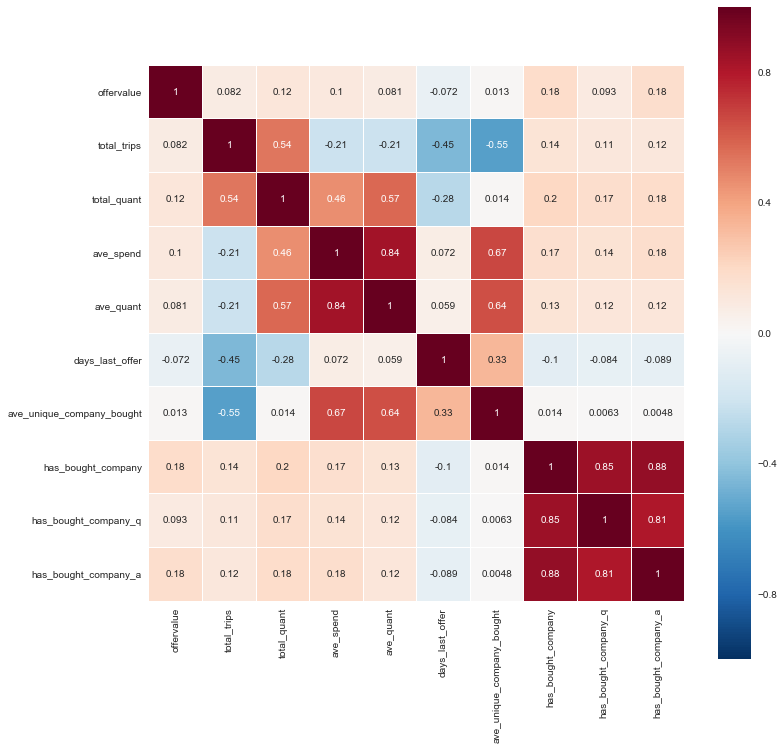

In [112]:
#Plot correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,12))
sns.heatmap(cor,square=True,linewidths=0.1,annot=True)
plt.yticks(rotation=0)

 Plot shows that "ave_spend", "ave_quant", and "ave_unique_company_bought" have high positive correlation.     
Also, "has_bought_company", "has_bought_company_q","has_bought_company_a" have high positive correlation.

#### Univariate Plots 

In [107]:
#Draw Univariate Plots 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def draw_plot(variable):

    ax1 = sns.countplot(variable,data=X_features)
    ax1.set_ylim(0,7000)
    ax1.grid(False)

    # Calculate Defualt Rate
    prob = X_features.groupby(variable).mean()['repeater']

    # Middle point for each bar
    xaxis=[]
    for p in ax1.patches:  #divide into single patch
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        xaxis.append(x.mean())

    # Default Rate Line
    ax2 = ax1.twinx()
    ax2.plot(xaxis,prob,'r--', label='Repeat Probability')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Repeat Purchase Probability')
    ax2.legend()
    ax2.grid(None) 

    # Annotate Defualt Rate
    for i in range(len(prob)):
        ax2.annotate('{:.1f}%'.format(prob.iloc[i]*100), (xaxis[i], prob.iloc[i]+0.025), 
                ha='center',va='bottom') # set the alignment of the text

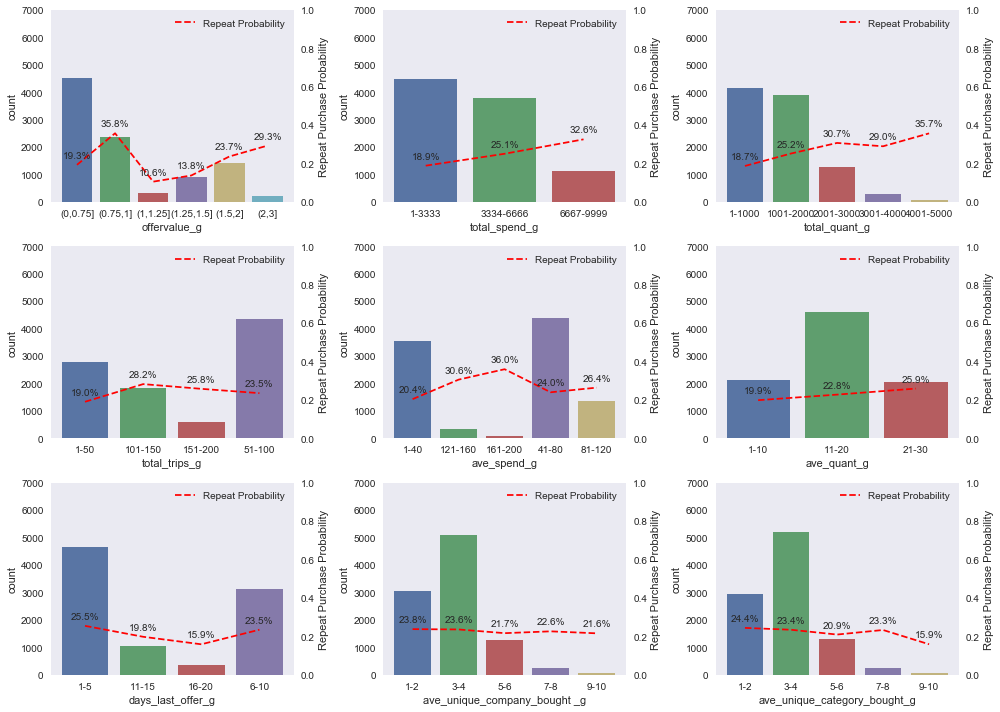

In [108]:
plt.figure(figsize=(14, 10))

plt.subplot(331)
bins = [0,0.75,1,1.25,1.5,2,3]
group_names =['(0,0.75]','(0.75,1]','(1,1.25]','(1.25,1.5]','(1.5,2]','(2,3]']
X_features['offervalue_g'] = pd.cut(X_features['offervalue'],bins,labels=group_names)
draw_plot('offervalue_g')

plt.subplot(332)
bins = [0,3333,6666,9999]
group_names =['1-3333','3334-6666','6667-9999']
X_features['total_spend_g'] = pd.cut(X_features['total_spend'],bins,labels=group_names)
draw_plot('total_spend_g')

plt.subplot(333)
bins = [0,1000,2000,3000,4000,5000]
group_names =['1-1000','1001-2000','2001-3000','3001-4000','4001-5000']
X_features['total_quant_g'] = pd.cut(X_features['total_quant'],bins,labels=group_names)
draw_plot('total_quant_g')

plt.subplot(334)
bins = [0,50,100,150,200]
group_names =['1-50','51-100','101-150','151-200']
X_features['total_trips_g'] = pd.cut(X_features['total_trips'],bins,labels=group_names)
draw_plot('total_trips_g')

plt.subplot(335)
bins = [0,40,80,120,160,200]
group_names =['1-40','41-80','81-120','121-160','161-200']
X_features['ave_spend_g'] = pd.cut(X_features['ave_spend'],bins,labels=group_names)
draw_plot('ave_spend_g')

plt.subplot(336)
bins = [0,10,20,30]
group_names =['1-10','11-20','21-30']
X_features['ave_quant_g'] = pd.cut(X_features['ave_quant'],bins,labels=group_names)
draw_plot('ave_quant_g')

plt.subplot(337)
bins = [0,5,10,15,20]
group_names =['1-5','6-10','11-15','16-20']
X_features['days_last_offer_g'] = pd.cut(X_features['days_last_offer'],bins,labels=group_names)
draw_plot('days_last_offer_g')

plt.subplot(338)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['ave_unique_company_bought _g'] = pd.cut(X_features['ave_unique_company_bought'],bins,labels=group_names)
draw_plot('ave_unique_company_bought _g')

plt.subplot(339)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['ave_unique_category_bought_g'] = pd.cut(X_features['ave_unique_category_bought'],bins,labels=group_names)
draw_plot('ave_unique_category_bought_g')

plt.tight_layout()

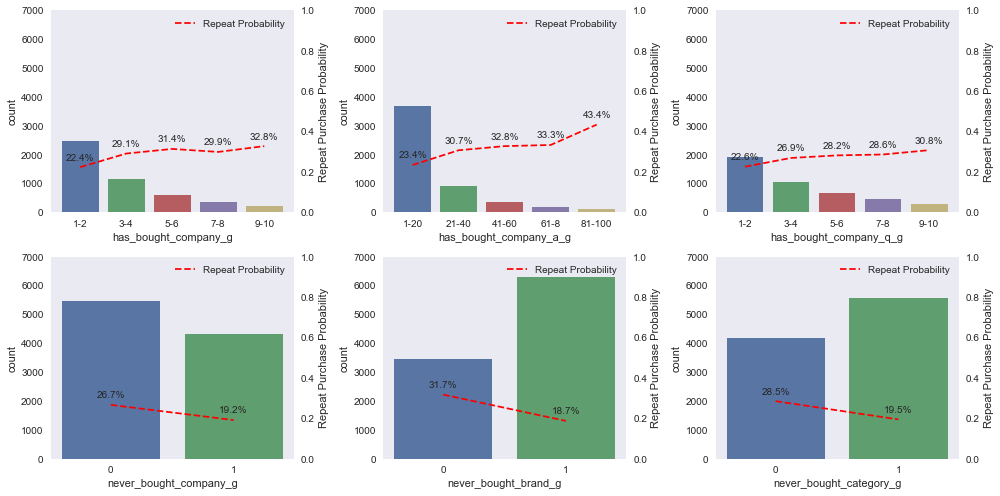

In [109]:
plt.figure(figsize=(14, 10))

plt.subplot(331)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['has_bought_company_g'] = pd.cut(X_features['has_bought_company'],bins,labels=group_names)
draw_plot('has_bought_company_g')

plt.subplot(332)
bins = [0,20,40,60,80,100]
group_names =['1-20','21-40','41-60','61-8','81-100']
X_features['has_bought_company_a_g'] = pd.cut(X_features['has_bought_company_a'],bins,labels=group_names)
draw_plot('has_bought_company_a_g')

plt.subplot(333)
bins = [0,2,4,6,8,10]
group_names =['1-2','3-4','5-6','7-8','9-10']
X_features['has_bought_company_q_g'] = pd.cut(X_features['has_bought_company_q'],bins,labels=group_names)
draw_plot('has_bought_company_q_g')

plt.subplot(334)
bins = [-1,0,1]
group_names =['0','1']
X_features['never_bought_company_g'] = pd.cut(X_features['never_bought_company'],bins,labels=group_names)
draw_plot('never_bought_company_g')

plt.subplot(335)
bins = [-1,0,1]
group_names =['0','1']
X_features['never_bought_brand_g'] = pd.cut(X_features['never_bought_brand'],bins,labels=group_names)
draw_plot('never_bought_brand_g')

plt.subplot(336)
bins = [-1,0,1]
group_names =['0','1']
X_features['never_bought_category_g'] = pd.cut(X_features['never_bought_category'],bins,labels=group_names)
draw_plot('never_bought_category_g')

plt.tight_layout()

### Model Execution Strategy<a name='Implementing Algorithms' />

#### 1. Single Model
 - Drop unnecessary features in X_features     
  - 'id','offer','repeater','repeattrips','offerdate',
    'never_bought_company','never_bought_category','never_bought_brand'
 - Split the data into training and test sets with ratio of 7:3
 - Logistic Regresison
  - Feature Selection
  - Tune The regularization parameters using 10 folds cross-validation and check the highest AUC score
 - Naive Bayes   
 
#### 2. Ensemble Model
 - Bagging
  - K Nearest Neighbors
  - Support Vecotr Machine
 - Random Forest
 - AdaBoost
 - Gradient Tree Boosting
 - Voting Classifier
 - XGBoost
  - Tune the number of trees and max depth in XGBoost using 10 folds cross-validation and check the highest AUC score
  
#### 3. Stacking
- Generate a 3-model ensemble (GBM + RF + NB)
- Generate a random grid of models and stack them together


In [54]:
#Predction using Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline

In [55]:
X_features = pd.read_csv('X_features.csv')

In [56]:
Y_features = X_features[['id','repeater']]
X_features.drop(['id','offer','quantity','repeater','repeattrips','offerdate','never_bought_company','never_bought_category','never_bought_brand'],axis=1,inplace=True)
X_features.shape

(9760, 88)

In [57]:
# Split the data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X_features,Y_features.repeater,test_size=0.3,random_state=3)

In [161]:
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)


In [162]:
train = pd.concat([X_train,Y_train],1)
test = pd.concat([X_test,Y_test],1)

In [163]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [164]:
train.to_csv('train.csv',sep=',',index=False)
test.to_csv('test.csv',sep=',',index=False)

### Single Models

#### Logistic Regression

In [63]:
# Feature Selection: compute ANOVA F-value and select features accoring to the k highest features
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
k = [20,25,30,35,40,45,50,60,70,80,88]
for i in k:
    clf = LogisticRegression()
    filter1 = SelectKBest(f_classif, k=i)
    pipe = Pipeline([('anova', filter1), ('logistic', clf)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    prob = pipe.predict_proba(X_test)
    preds =  pipe.predict(X_test)
    score = roc_auc_score(Y_test, prob[:,1])
    print ('AUC score for k={0:d} is: {1:.3%}'.format(i,score))

AUC score for k=20 is: 60.796%
AUC score for k=25 is: 61.405%
AUC score for k=30 is: 62.132%
AUC score for k=35 is: 65.751%
AUC score for k=40 is: 65.587%
AUC score for k=45 is: 65.860%
AUC score for k=50 is: 66.958%
AUC score for k=60 is: 67.447%
AUC score for k=70 is: 68.096%
AUC score for k=80 is: 68.150%
AUC score for k=88 is: 68.129%


In [64]:
# Create new dataframe with only desired columns
clf = LogisticRegression()
filter1 = SelectKBest(f_classif, k=80)
pipe = Pipeline([('anova', filter1), ('logistic', clf)])
pipe.fit(X_train, Y_train)
idxs_selected = filter1.get_support(indices=True)
features_new = X_features.columns[idxs_selected]
X_train_selected = X_train[features_new]
X_test_selected = X_test[features_new]
X_selected = pd.concat([X_train_selected,X_test_selected])


In [65]:
features_new

Index([u'total_spend', u'total_quant', u'total_trips', u'ave_spend',
       u'ave_quant', u'unique_company_bought', u'unique_category_bought',
       u'unique_brand_bought', u'ave_unique_company_bought',
       u'ave_unique_category_bought', u'days_last_offer',
       u'has_bought_company', u'has_bought_company_q', u'has_bought_company_a',
       u'has_bought_company_30', u'has_bought_company_q_30',
       u'has_bought_company_a_30', u'has_bought_company_60',
       u'has_bought_company_q_60', u'has_bought_company_a_60',
       u'has_bought_company_90', u'has_bought_company_q_90',
       u'has_bought_company_a_90', u'has_bought_company_180',
       u'has_bought_company_q_180', u'has_bought_company_a_180',
       u'has_bought_category', u'has_bought_category_q',
       u'has_bought_category_a', u'has_bought_category_30',
       u'has_bought_category_q_30', u'has_bought_category_a_30',
       u'has_bought_category_60', u'has_bought_category_q_60',
       u'has_bought_category_a_60', u'ha

In [62]:
#Hyperparameter Tuning: tune regularization parameter in 10-fold cross-validation
model = LogisticRegression()
C = [0.03,0.09,0.27,0.81,1.0,3.0,9.0,27.0,81.0,243.0]
print(C)
param_grid = dict(C=C)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[0.03, 0.09, 0.27, 0.81, 1.0, 3.0, 9.0, 27.0, 81.0, 243.0]
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.7s finished


Best: 0.668012 using {'C': 0.03}
0.668012 (0.026313) with: {'C': 0.03}
0.666422 (0.025552) with: {'C': 0.09}
0.665131 (0.025350) with: {'C': 0.27}
0.664287 (0.025666) with: {'C': 0.81}
0.664261 (0.025711) with: {'C': 1.0}
0.663532 (0.025809) with: {'C': 3.0}
0.663279 (0.025830) with: {'C': 9.0}
0.663117 (0.025926) with: {'C': 27.0}
0.663089 (0.025936) with: {'C': 81.0}
0.663093 (0.025935) with: {'C': 243.0}


In [67]:
# Check performance is test dataset usin C=0.03 and k=80
model = LogisticRegression(C=0.03)
model.fit(X_train_selected,Y_train)
prob = model.predict_proba(X_test_selected)
score = roc_auc_score(Y_test,prob[:,1])
print ('AUC score is {:.2%}'.format(score))

AUC score is 67.88%


#### Gaussian Naive Bayes

In [69]:
# Fit the training model
NB = GaussianNB()
NB.fit(X_train,Y_train)

# Prediction from X_test
Y_pred = NB.predict(X_test)
prob = NB.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print ('AUC score is: {:.2%}'.format(score))

AUC score is: 65.45%


### Ensemble Models

#### Bagging
- K Nearest Neighbors
 - Choose n_neighbors=5
- Support Vector Machine
 - Tune Hyperparameter
 - Choose n_estimators=5, C=2

In [ ]:
######## Bagging Algorithm - K Nearest Neighbors ########

In [26]:
BaggingClassifier?

In [20]:
KNeighborsClassifier?

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=5)

In [22]:
bag = BaggingClassifier(
    m, 
    max_samples=1.0, 
    n_jobs=2,
    oob_score=True)

In [23]:
bag.fit(X_train, Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=2, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [24]:
bag.oob_score_

0.73141100702576112

In [25]:
# Prediction from X_test
Y_pred = bag.predict(X_test)
prob = bag.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print ('AUC score is: {:.2%}'.format(score))

AUC score is: 60.81%


In [29]:
######## Bagging Algorithm - Support Vector Machine ########

In [28]:
SVC?

In [72]:
# Take some time
# Tune hyperparameters
parameters = {'n_estimators': (5, 10),
              'base_estimator__C': (1,2,4)}
 
grid_search = GridSearchCV(BaggingClassifier(SVC()),parameters,scoring="roc_auc")
    
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.641167 using {'base_estimator__C': 4, 'n_estimators': 10}


In [76]:
# Check performance in test dataset
bag = BaggingClassifier(
    SVC(C=4), 
    n_estimators=10,
    max_samples=1.0, 
    n_jobs=2,
    oob_score=True)

In [77]:
bag.fit(X_train, Y_train)

BaggingClassifier(base_estimator=SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=2, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [78]:
# Prediction from X_test
Y_pred = bag.predict(X_test)
prob = bag.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print ('AUC score is: {:.2%}'.format(score))

AUC score is: 58.38%


#### Random Forest

In [47]:
RandomForestClassifier?

In [43]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=15, oob_score=True)
m.fit(X_train, Y_train)
Y_pred = m.predict(X_test)
prob = m.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score is: {:.2%}'.format(score)

AUC score is: 61.59%


#### AdaBoost

In [46]:
AdaBoostClassifier?

In [49]:
from sklearn.ensemble import AdaBoostClassifier 
m = AdaBoostClassifier(n_estimators=30)
m.fit(X_train, Y_train)
Y_pred = m.predict(X_test)
prob = m.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score is: {:.2%}'.format(score)

AUC score is: 66.70%


#### Gradient Tree Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
m = GradientBoostingClassifier(n_estimators=10)
m.fit(X_train, Y_train)
Y_pred = m.predict(X_test)
prob = m.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score is: {:.2%}'.format(score)

AUC score is: 67.95%


#### Voting Classifier

In [54]:
VotingClassifier?

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [55]:
m = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('rf', RandomForestClassifier()), 
                ('gnb', GaussianNB())], 
                voting='soft')

m.fit(X_train, Y_train)
Y_pred = m.predict(X_test)
prob = m.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score is: {:.2%}'.format(score)

AUC score is: 64.61%


#### XGBoost

In [84]:
import numpy
from matplotlib import pyplot

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   27.0s finished


Best: 0.672357 using {'n_estimators': 15, 'max_depth': 4}
0.633942 (0.023852) with: {'n_estimators': 5, 'max_depth': 2}
0.648556 (0.020966) with: {'n_estimators': 10, 'max_depth': 2}
0.659493 (0.018645) with: {'n_estimators': 15, 'max_depth': 2}
0.663829 (0.021679) with: {'n_estimators': 20, 'max_depth': 2}
0.668036 (0.022237) with: {'n_estimators': 5, 'max_depth': 4}
0.671583 (0.024060) with: {'n_estimators': 10, 'max_depth': 4}
0.672357 (0.021990) with: {'n_estimators': 15, 'max_depth': 4}
0.670560 (0.021514) with: {'n_estimators': 20, 'max_depth': 4}
0.661224 (0.017080) with: {'n_estimators': 5, 'max_depth': 6}
0.665126 (0.017945) with: {'n_estimators': 10, 'max_depth': 6}
0.666019 (0.017322) with: {'n_estimators': 15, 'max_depth': 6}
0.665652 (0.017073) with: {'n_estimators': 20, 'max_depth': 6}
0.651146 (0.015239) with: {'n_estimators': 5, 'max_depth': 8}
0.659669 (0.018395) with: {'n_estimators': 10, 'max_depth': 8}
0.657176 (0.018880) with: {'n_estimators': 15, 'max_depth': 8}
0

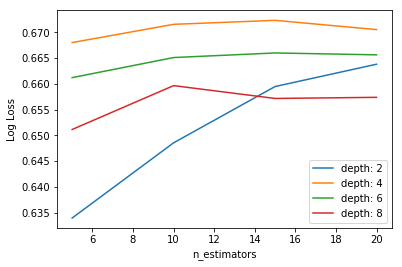

In [85]:
#Hyperparameter Tuning: tune The Number of Trees and Max Depth in XGBoost (10 foldes cross-validation)
# grid search
model = XGBClassifier()
n_estimators = [5, 10, 15, 20]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')


In [87]:
# Check performance
params = {
    'objective': 'binary:logistic',
    'max_depth': 4,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 15
}

bst = XGBClassifier(**params).fit(X_train, Y_train)

prob = bst.predict_proba(X_test)[:,1]
score = roc_auc_score(Y_test,prob)

preds = bst.predict(X_test)

correct = 0
for i in range(len(preds)):
    if (Y_test.iloc[i] == preds[i]):
        correct += 1
        
acc = accuracy_score(Y_test, preds)

print ('AUC score: {0:.2%}'.format(score))
print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4%}'.format(1-acc))


AUC score: 63.30%
Predicted correctly: 2217/2928
Error: 24.2828%


### Stacking

In [1]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.naive_bayes  import H2ONaiveBayesEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
from __future__ import print_function
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /Users/Frank/anaconda/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/m5/352p7lrs3xsbghgj8hxc88h40000gn/T/tmpd5euQv
  JVM stdout: /var/folders/m5/352p7lrs3xsbghgj8hxc88h40000gn/T/tmpd5euQv/h2o_Frank_started_from_python.out
  JVM stderr: /var/folders/m5/352p7lrs3xsbghgj8hxc88h40000gn/T/tmpd5euQv/h2o_Frank_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.5.3
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_Frank_eook6l
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [2]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# Identify predictors and response
x = train.columns
y = "repeater"
x.remove(y)

In [4]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()


In [5]:
# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

In [127]:
# Note: All base models must have the same cross-validation folds and
# the cross-validated predicted values must be kept.

In [124]:
# 1. Generate a 3-model ensemble (GBM + RF + NB)

In [14]:
# Train and cross-validate a GBM
my_gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      learn_rate=0.2,
                                      nfolds=nfolds,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=1)
my_gbm.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [23]:
# Train and cross- validate a Naive Bayes
my_nb = H2ONaiveBayesEstimator(nfolds=nfolds,
                               fold_assignment="Modulo",
                               keep_cross_validation_predictions=True,
                               seed=1)

my_nb.train(x=x, y=y, training_frame=train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [15]:
# Train and cross-validate a RF
my_rf = H2ORandomForestEstimator(ntrees=50,
                                 nfolds=nfolds,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [24]:
# Train a stacked ensemble using the GBM and RF above
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=[my_gbm.model_id, my_rf.model_id,my_nb.model_id])
ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [25]:
# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(test)

In [26]:
# Compare to base learner performance on the test set
perf_gbm_test = my_gbm.model_performance(test)
perf_rf_test = my_rf.model_performance(test)
baselearner_best_auc_test = max(perf_gbm_test.auc(), perf_rf_test.auc())
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

Best Base-learner Test AUC:  0.675056000913
Ensemble Test AUC:  0.67188804519


In [19]:
# Generate predictions on a test set (if neccessary)
pred = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


<br><br>

In [132]:
# 2. Generate a random grid of models and stack them together

In [6]:
# Specify GBM hyperparameters for the grid
hyper_params = {"learn_rate": [0.01, 0.03],
                "max_depth": [3, 4, 5, 6, 9],
                "sample_rate": [0.7, 0.8, 0.9, 1.0],
                "col_sample_rate": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 3, "seed": 1}

In [7]:
# Train the grid
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees=10,
                                                        seed=1,
                                                        nfolds=nfolds,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                                                        hyper_params=hyper_params,
                                                        search_criteria=search_criteria,
                                                        grid_id="gbm_grid_binomial")
grid.train(x=x, y=y, training_frame=train)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [8]:
# Train a stacked ensemble using the GBM grid
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_gbm_grid_binomial",
                                       base_models=grid.model_ids)
ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [9]:
# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(test)

In [10]:
# Compare to base learner performance on the test set
baselearner_best_auc_test = max([h2o.get_model(model).model_performance(test_data=test).auc() for model in grid.model_ids])
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

Best Base-learner Test AUC:  0.680531160688
Ensemble Test AUC:  0.677166739991


In [11]:
# Generate predictions on a test set (if neccessary)
pred = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%
